# Deep Learning Assignment - 3 

## Importing the Libraries

In [1]:
#We import all the necessary libraries in this section of the code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from keras.layers import BatchNormalization,Dropout,Activation
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Reading the Dataset and Preprocessing

In [ ]:
# Here we import the training set
tr_d = pd.read_csv('/gooogle-stock-price/Google_Stock_Price_Train.csv')

In [ ]:
# Here we import the test data for later use
test = pd.read_csv('/gooogle-stock-price/Google_Stock_Price_Test.csv')
originaltestoutputs = test.loc[:, ["Open"]].values

In [4]:
#We print the head of the dataset to see standard values and the columns in the dataset
tr_d.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


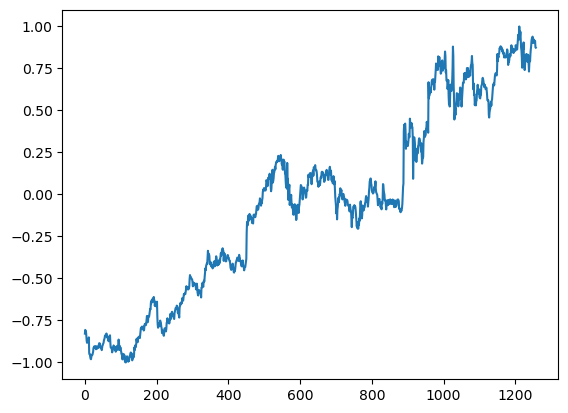

In [41]:
# We need to scale the features for the model to predict accurately.
# Hence, we are going to use MinMaxScaler to perform Feature Scaling
# We use the (-1,1) feature range as we are using tanh activation function
train = tr_d.loc[:, ["Open"]].values
scaler = MinMaxScaler(feature_range = (-1, 1))
finals = scaler.fit_transform(train)
plt.plot(finals)
plt.show()

In [42]:
# Using 32 Timesteps, Here we specify the timesteps we are going to use to predict future sequence.
# Hence this is critical to training a sequence based model  
X_train = []
y_train = []
timesteps = 32
for i in range(timesteps, 1258):
    X_train.append(finals[i-timesteps:i, 0])
    y_train.append(finals[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Vanilla RNN Model

In [ ]:

# RNN Model - The model consist of a mixture of RNN layers and Dropout layers to prevent overfitting. 
# Finally there is a dense layer with a single output of the predicted value
model = Sequential([
        SimpleRNN(units = 30,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)),
        Dense(units = 1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 4s 22ms/step - loss: 0.3228
Epoch 2/100
39/39 [==============================] - 1s 23ms/step - loss: 0.1430
Epoch 3/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0933
Epoch 4/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0669
Epoch 5/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0547
Epoch 6/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0413
Epoch 7/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0396
Epoch 8/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0303
Epoch 9/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0291
Epoch 10/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0283
Epoch 11/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0221
Epoch 12/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0209
Epoch 13/100
39/39 [=====

## Using Test Data to Predict and Visualise the output

In [56]:
# Getting the predicted stock price of the model
total = pd.concat((tr_d['Open'], test['Open']), axis = 0)
inputs = total[len(total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

1/1 [==============================] - 0s 375ms/step


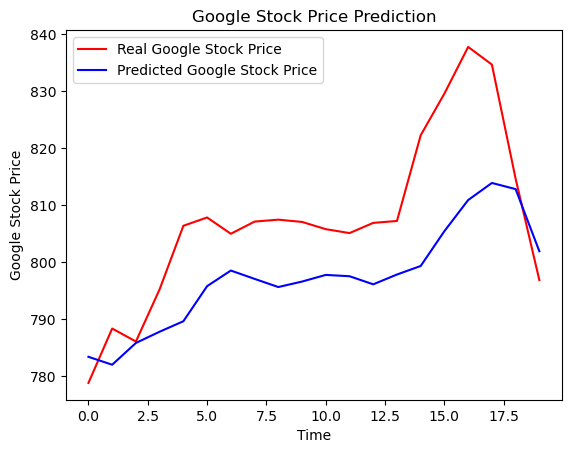

In [57]:
#Here, we prepare the predicted variables for visualization
X_test = []
for i in range(timesteps, len(inputs)): 
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)

# Visualising the results
plt.plot(originaltestoutputs, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [66]:
# Performance Metrics
rmse = np.sqrt(mean_squared_error(originaltestoutputs, pred))
print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate R-squared (R²)
r2 = r2_score(originaltestoutputs, pred)
print("R-squared (R²)", r2)


Root Mean Squared Error (RMSE): 13.3361754426306
R-squared (R²) 0.18167912682596066


## LSTM Model


In [ ]:
#Here we use a variant, the LSTM model which has provided us with the best results
model2 = Sequential([
    LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='tanh'),
    Dropout(0.2),
    Dense(units=1)
])

model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 8s 53ms/step - loss: 0.0443
Epoch 2/100
39/39 [==============================] - 2s 50ms/step - loss: 0.0104
Epoch 3/100
39/39 [==============================] - 2s 47ms/step - loss: 0.0097
Epoch 4/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0081
Epoch 5/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0084
Epoch 6/100
39/39 [==============================] - 2s 52ms/step - loss: 0.0084
Epoch 7/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0088
Epoch 8/100
39/39 [==============================] - 2s 47ms/step - loss: 0.0085
Epoch 9/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0072
Epoch 10/100
39/39 [==============================] - 2s 50ms/step - loss: 0.0086
Epoch 11/100
39/39 [==============================] - 2s 51ms/step - loss: 0.0073
Epoch 12/100
39/39 [==============================] - 2s 54ms/step - loss: 0.0074
Epoch 13/100
39/39 [=====

1/1 [==============================] - 0s 41ms/step


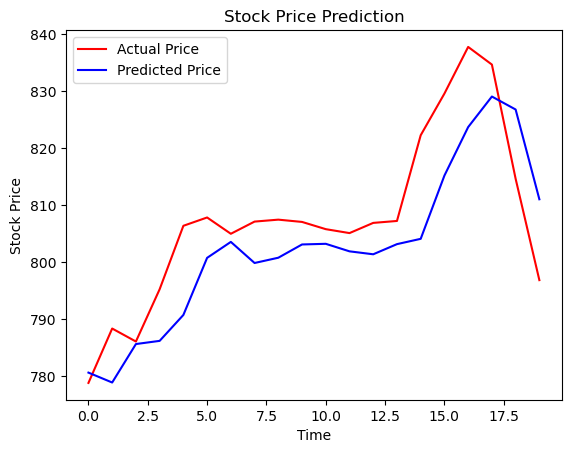

In [62]:
X_test = []
for i in range(timesteps, len(inputs)): 
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred2 = model2.predict(X_test)
pred2 = scaler.inverse_transform(pred2)

# Visualising the results
plt.plot(originaltestoutputs, color = 'red', label = 'Actual Price')
plt.plot(pred2, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [63]:
# Performance Metrics
rmse = np.sqrt(mean_squared_error(originaltestoutputs, pred2))
print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate R-squared (R²)
r2 = r2_score(originaltestoutputs, pred2)
print("R-squared (R²)", r2)


Root Mean Squared Error (RMSE): 9.399642926993248
R-squared (R²) 0.5934782929443043


## GRU Model

In [60]:
model3 = Sequential([
    GRU(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(units=50, activation='tanh', return_sequences=True),
    Dropout(0.2),
    GRU(units=50, activation='tanh'),
    Dropout(0.2),
    Dense(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

model3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 8s 49ms/step - loss: 0.0746
Epoch 2/100
39/39 [==============================] - 2s 50ms/step - loss: 0.0187
Epoch 3/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0146
Epoch 4/100
39/39 [==============================] - 2s 47ms/step - loss: 0.0145
Epoch 5/100
39/39 [==============================] - 2s 49ms/step - loss: 0.0122
Epoch 6/100
39/39 [==============================] - 2s 52ms/step - loss: 0.0114
Epoch 7/100
39/39 [==============================] - 2s 51ms/step - loss: 0.0105
Epoch 8/100
39/39 [==============================] - 2s 52ms/step - loss: 0.0113
Epoch 9/100
39/39 [==============================] - 2s 50ms/step - loss: 0.0110
Epoch 10/100
39/39 [==============================] - 2s 56ms/step - loss: 0.0104
Epoch 11/100
39/39 [==============================] - 2s 52ms/step - loss: 0.0103
Epoch 12/100
39/39 [==============================] - 2s 50ms/step - loss: 0.0099
Epoch 13/100
39/39 [=====

1/1 [==============================] - 1s 1s/step


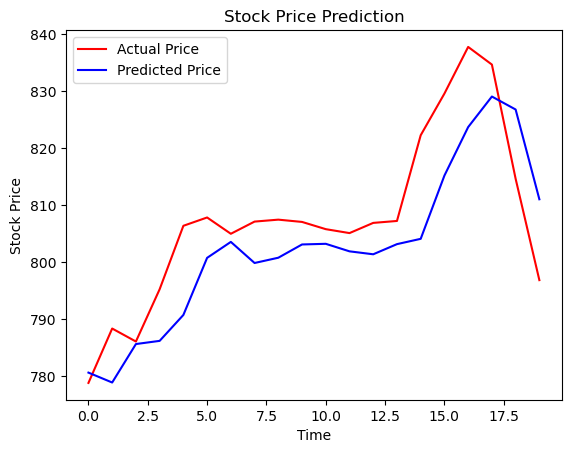

In [64]:
X_test = []
for i in range(timesteps, len(inputs)): 
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred3 = model3.predict(X_test)
pred3 = scaler.inverse_transform(pred3)

# Visualising the results
plt.plot(originaltestoutputs, color = 'red', label = 'Actual Price')
plt.plot(pred2, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [65]:
# Performance Metrics
rmse = np.sqrt(mean_squared_error(originaltestoutputs, pred3))
print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate R-squared (R²)
r2 = r2_score(originaltestoutputs, pred3)
print("R-squared (R²)", r2)


Root Mean Squared Error (RMSE): 19.730445867084725
R-squared (R²) -0.7911618379311538


## Combined Graph of All Models

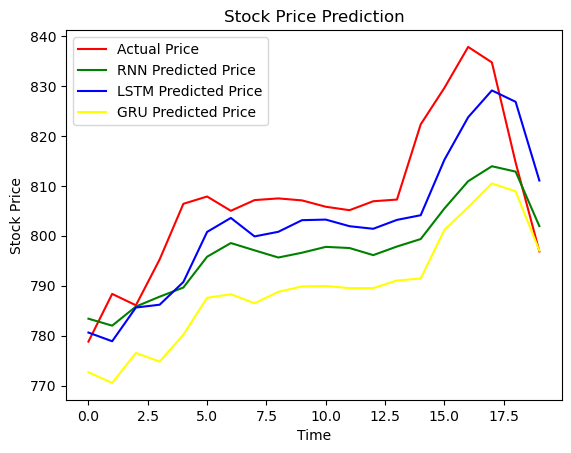

In [67]:
plt.plot(originaltestoutputs, color = 'red', label = 'Actual Price')
plt.plot(pred, color = 'green', label = 'RNN Predicted Price')
plt.plot(pred2, color = 'blue', label = 'LSTM Predicted Price')
plt.plot(pred3, color = 'yellow', label = 'GRU Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Improvement of LSTM Model

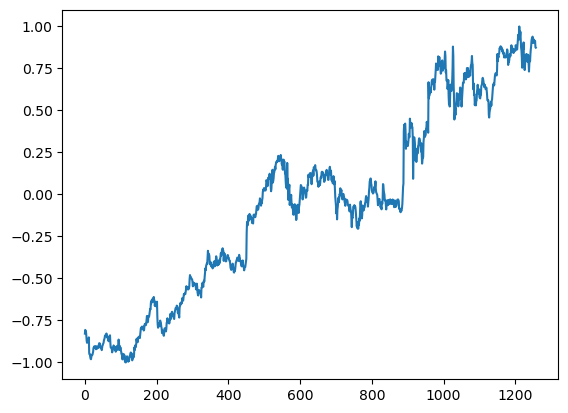

In [5]:
# We need to scale the features for the model to predict accurately.
# Hence, we are going to use MinMaxScaler to perform Feature Scaling
# We use the (-1,1) feature range as we are using tanh activation function
train = tr_d.loc[:, ["Open"]].values
scaler = MinMaxScaler(feature_range = (-1, 1))
finals = scaler.fit_transform(train)
plt.plot(finals)
plt.show()

In [15]:
# Using 50 Timesteps 
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(finals[i-timesteps:i, 0])
    y_train.append(finals[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
finalmodel = Sequential([
    LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, activation='tanh'),
    Dropout(0.2),
    Dense(units=1)
])

finalmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')
finalmodel.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 78ms/step - loss: 0.0488
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0128
Epoch 3/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0099
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0095
Epoch 5/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0089
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0089
Epoch 7/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0080
Epoch 8/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0083
Epoch 9/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0085
Epoch 10/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0071
Epoch 11/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0079
Epoch 12/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0068
Epoch 13/100
38/38 [=====

1/1 [==============================] - 1s 1s/step


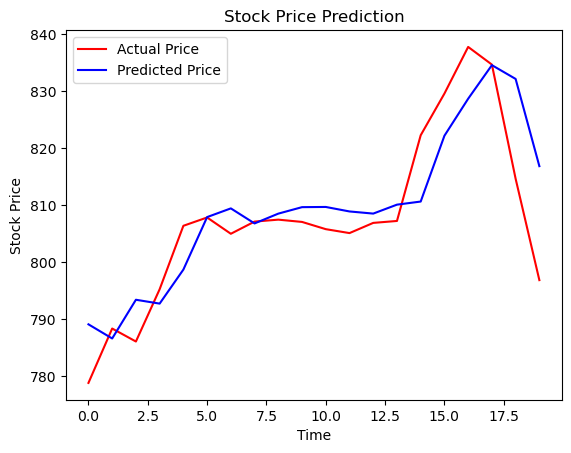

In [17]:
# Getting the predicted stock price of 2017
total = pd.concat((tr_d['Open'], test['Open']), axis = 0)
inputs = total[len(total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)): 
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
fpred = finalmodel.predict(X_test)
fpred = scaler.inverse_transform(fpred)

# Visualising the results
plt.plot(originaltestoutputs, color = 'red', label = 'Actual Price')
plt.plot(fpred, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
# Performance Metrics
rmse = np.sqrt(mean_squared_error(originaltestoutputs, fpred))
print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate R-squared (R²)
r2 = r2_score(originaltestoutputs, fpred)
print("R-squared (R²)", r2)


Root Mean Squared Error (RMSE): 7.992058047868887
R-squared (R²) 0.70611441278679


## Improvement 2 - Timesteps and Architecture

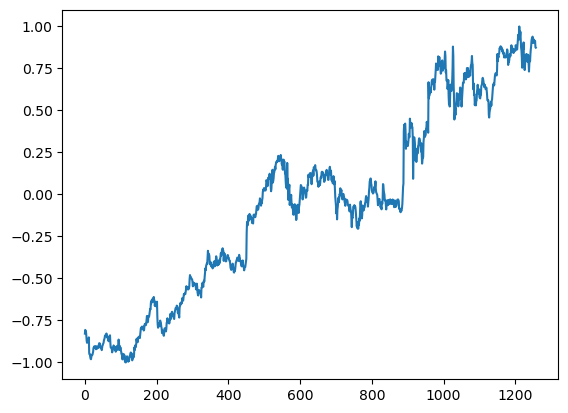

In [33]:
# We need to scale the features for the model to predict accurately.
# Hence, we are going to use StandardScaler to perform Feature Scaling
# We use the (-1,1) feature range as we are using tanh activation function
train = tr_d.loc[:, ["Open"]].values
scaler = MinMaxScaler(feature_range = (-1, 1))
finals = scaler.fit_transform(train)
plt.plot(finals)
plt.show()

In [46]:
# Using 50 Timesteps 
X_train = []
y_train = []
timesteps = 100
for i in range(timesteps, 1258):
    X_train.append(finals[i-timesteps:i, 0])
    y_train.append(finals[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [47]:
finalmodel = Sequential([
    LSTM(units=30, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=30, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(units=30, activation='tanh'),
    Dropout(0.2),
    Dense(units=1)
])

finalmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')
finalmodel.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 11s 125ms/step - loss: 0.0715
Epoch 2/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0149
Epoch 3/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0115
Epoch 4/100
37/37 [==============================] - 5s 127ms/step - loss: 0.0118
Epoch 5/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0110
Epoch 6/100
37/37 [==============================] - 5s 125ms/step - loss: 0.0107
Epoch 7/100
37/37 [==============================] - 5s 133ms/step - loss: 0.0102
Epoch 8/100
37/37 [==============================] - 5s 127ms/step - loss: 0.0096
Epoch 9/100
37/37 [==============================] - 5s 126ms/step - loss: 0.0095
Epoch 10/100
37/37 [==============================] - 5s 127ms/step - loss: 0.0086
Epoch 11/100
37/37 [==============================] - 5s 128ms/step - loss: 0.0087
Epoch 12/100
37/37 [==============================] - 5s 128ms/step - loss: 0.0088
Epoch 13/100

1/1 [==============================] - 1s 1s/step


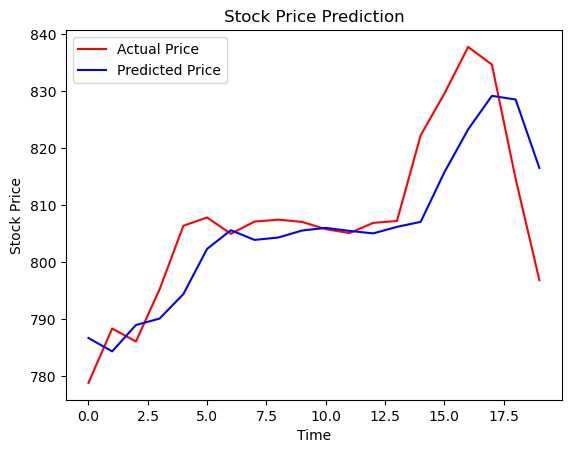

In [48]:
# Getting the predicted stock price of 2017
total = pd.concat((tr_d['Open'], test['Open']), axis = 0)
inputs = total[len(total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)): 
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
fpred = finalmodel.predict(X_test)
fpred = scaler.inverse_transform(fpred)

# Visualising the results
plt.plot(originaltestoutputs, color = 'red', label = 'Actual Price')
plt.plot(fpred, color = 'blue', label = 'Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [49]:
# Performance Metrics
rmse = np.sqrt(mean_squared_error(originaltestoutputs, fpred))
print("Root Mean Squared Error (RMSE):", rmse)

# # Calculate R-squared (R²)
r2 = r2_score(originaltestoutputs, fpred)
print("R-squared (R²)", r2)


Root Mean Squared Error (RMSE): 8.825607196487642
R-squared (R²) 0.6416146756785832
